# **AV1 (GABARITO)**


## O Desafio

O desafio é ensinar o computador a reconhecer números manuscritos a partir de imagens em tons de cinza.
Para isso, usamos um conjunto de dados chamado `digits`, disponível no `scikit-learn`.

A função `load_digits` carrega um conjunto de dados de imagens de dígitos (0 a 9) escritas à mão, já incluído no `scikit-learn`. Cada imagem representa um número e está associada ao rótulo correto. Ao chamar:

```python
from sklearn.datasets import load_digits
digits = load_digits()
```

Você obtém:
- `digits.images`: As imagens em formato matriz 8×8 (grayscale)
- `digits.data`: As mesmas imagens, mas já achatadas em vetores de 64 posições
- `digits.target`: Os rótulos reais (de 0 a 9) para cada imagem

Cada imagem é uma matriz 8x8 com valores de pixels entre 0 e 16, representando o quão claro ou escuro é o pixel (0 = preto, 16 = branco).

Exemplo:
```python
digits.images[0] = array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])
```

Essa imagem representa o número 0, então digits.target[0] == 0.

## Objetivo

Seu objetivo é desenvolver um modelo de deep learning capaz de reconhecer números escritos à mão. Abaixo, o código deste modelo apresenta algumas lacunas que devem ser preenchidas. Analise cada linha de código a fim de que o objetivo seja alcançado. 

## Critério de Avaliação

Se o modelo atingir acurácia final (*model.evaluate*) igual ou superior a 90%, o aluno recebe nota máxima (3,0 pontos). Se a acurácia for inferior a 90%, a nota será proporcional à acurácia: 

$$ Nota = \frac{acuracia\text{ }obtida}{90} \times 3.0 $$


## Instruções de Envio

Após finalizar o modelo, chame o professor para correção. Em seguida, envie o mesmo arquivo no SIGAA.

**ATENÇÃO**: o lançamento da nota está condicionada ao envio do referido arquivo dentro do prazo estabelecido. Caso isso não aconteça, a pontuação da avaliação será zerada. 



## Pré-processamento

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Carregar dados
digits = load_digits()
X, y = digits.images, digits.target

# Normalizar os dados
# Os valores dos pixels estão entre 0 e 16
X = X / 16.0  

# Achatar as imagens, ou seja, transformar cada imagem 2D em um vetor 1D
X = X.reshape((X.shape[0], -1))

## Criação do Modelo

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

porcentagem_teste = 0.2
reprodutibilidade = 42

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=porcentagem_teste, stratify=y, random_state=reprodutibilidade)

In [ ]:
from tensorflow import keras
import tensorflow as tf

neuronios_camada_oculta = 128
ativacao_camada_oculta = 'relu'
reprodutibilidade_camada_oculta = 142
neuronios_camada_saida = 10
ativacao_camada_saida = 'softmax'

# Criar o modelo
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(64,) , name='camada_entrada'),
    tf.keras.layers.Dense(neuronios_camada_oculta, activation=ativacao_camada_oculta, name='camada_oculta', kernel_initializer=keras.initializers.RandomNormal(seed=reprodutibilidade_camada_oculta)),
    tf.keras.layers.Dense(neuronios_camada_saida, activation=ativacao_camada_saida , name='camada_saida')     
])

In [4]:
# Compilar o modelo
model.compile(
    loss='sparse_categorical_crossentropy',  # função de perda usada quando os rótulos estão como inteiros (ex: 0 a 9)
    optimizer='adam',                        # algoritmo de otimização eficiente e amplamente utilizado
    metrics=['accuracy']                     # mede a proporção de acertos, adequada para rótulos inteiros
)

## Teinamento do Modelo

In [ ]:
# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=10,                # número de vezes que o modelo verá todos os dados
    validation_split=0.1      # separa % dos dados de treino para validação
)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3563 - loss: 2.1669 - val_accuracy: 0.8056 - val_loss: 1.6797
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8561 - loss: 1.5117 - val_accuracy: 0.8819 - val_loss: 1.0613
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8854 - loss: 0.9309 - val_accuracy: 0.8958 - val_loss: 0.6712
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.9042 - loss: 0.6001 - val_accuracy: 0.9236 - val_loss: 0.4781
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.9319 - loss: 0.4441 - val_accuracy: 0.9306 - val_loss: 0.3820
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9451 - loss: 0.3359 - val_accuracy: 0.9514 - val_loss: 0.3186
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9423 - loss: 0.2724 - val_accuracy: 0.9375 - val_loss: 0.2708
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9607 - loss: 0.2203 - val_accuracy: 0.9514 - val_l

## Avaliação do Modelo

In [ ]:
# Gráfico de perda e acurácia durante o treinamento 1

import pandas as pd

pd.DataFrame(history.history).plot()
plt.grid()
plt.show()

In [ ]:
# Gráfico de perda e acurácia durante o treinamento 2

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(history.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(history.history['val_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

### Testando o Modelo

In [ ]:
dados_nao_treinados = X_test
rotulos_nao_treinados = y_test

model.evaluate(dados_nao_treinados, rotulos_nao_treinados)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9463 - loss: 0.2030 


[0.18269962072372437, 0.9555555582046509]

## Resultado

In [10]:
# Fazer previsões com os dados de teste
predicoes = model.predict(dados_nao_treinados)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


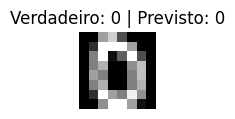

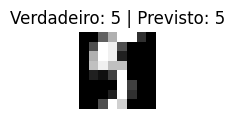

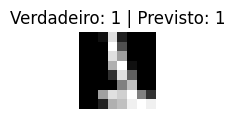

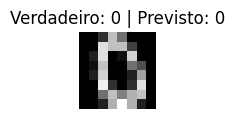

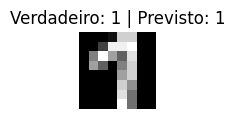

In [11]:
# Mostrar 5 imagens aleatórias com seus rótulos reais e previstos
import numpy as np
import matplotlib.pyplot as plt

# Selecionar 5 índices aleatórios do conjunto de teste
indices = np.random.choice(len(X_test), size=5, replace=False)

# Mostrar as 5 imagens com os rótulos reais e previstos
for i in indices:
    plt.figure(figsize=(1, 1))  # controla o tamanho da figura (largura x altura em polegadas)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Verdadeiro: {y_test[i]} | Previsto: {np.argmax(predicoes[i])}")
    plt.axis('off')
    plt.show()